In [3]:
import io
import matplotlib.image as mpimg 
import matplotlib.pyplot as plt
import numpy as np
import os
import os.path
import pickle
import PIL
import torch
import torchvision
import urllib
import warnings
import sys


sys.path.append(os.path.join(os.path.dirname(os.path.realpath('__file__')), '..'))
from attacks import eot_attacks
from attacks import utils
from utils import labels_util

# Disable annoying UserWarning caused by using nn.Upsample
# in the relighting model.
warnings.filterwarnings("ignore", category=UserWarning) 

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Load the relighting and classification models

In [5]:
config = {}
config['classif_model_name'] = 'alexnet'
config['relight_model_name'] = 'multi_illumination_murmann'
config['relighter_eps'] = 1e-4

checkpoint_path = '/nfs/homedirs/musat/adversarial-attacks-by-relighting/new_repo/project-1/'
checkpoint_path += 'relighters/multi_illumination/checkpoints/relight/epoch_13.pth'

relight_model = utils.load_relighting_model(config['relight_model_name'], checkpoint_path)
classif_model = utils.load_classification_model(config['classif_model_name'])

# ImageNet index to label dictionary.
idx_to_label = labels_util.load_idx_to_label('imagenet')

# Let's make everything a burrito!

## 1. In an unconstrained setting

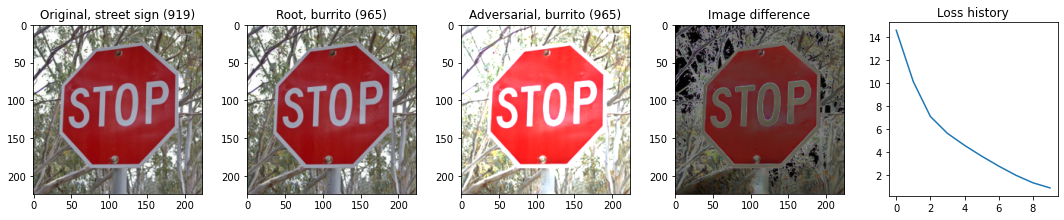

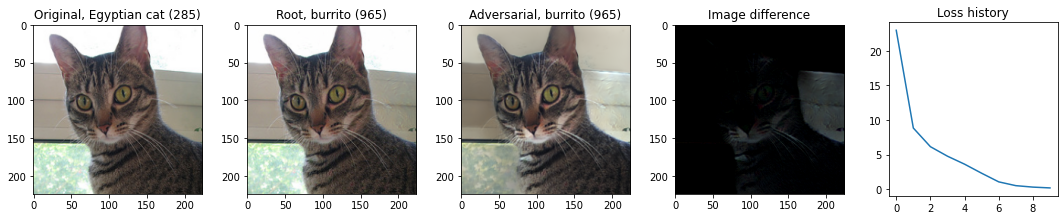

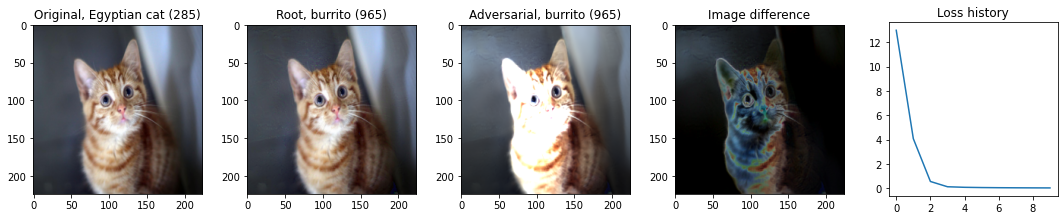

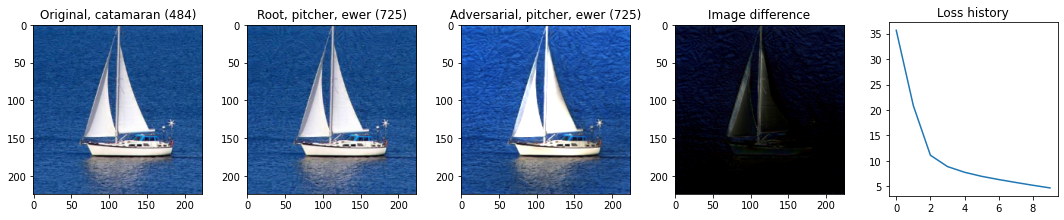

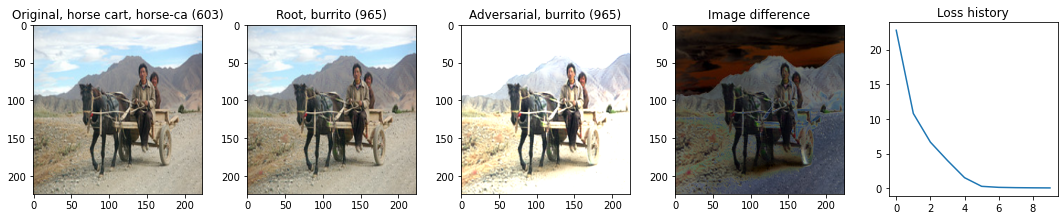

In [6]:
data_path = '../data/samples'

config['target_label'] = 965 # burrito label
config['debugging'] = False
config['num_iterations'] = 10
config['learning_rate'] = 0.1
config['attack_type'] = 'unrestricted_eot'
config['gamma'] = 1.3
config['eps'] = 0.2
    
for im_name in os.listdir(data_path):
    img = utils.read_image(os.path.join(data_path, im_name))  
    result = eot_attacks.do_attack(relight_model, classif_model, img, config)
    utils.visualize_attack(img, result, idx_to_label)
    config.pop('gt_label', None)

## 2. In a constrained setting

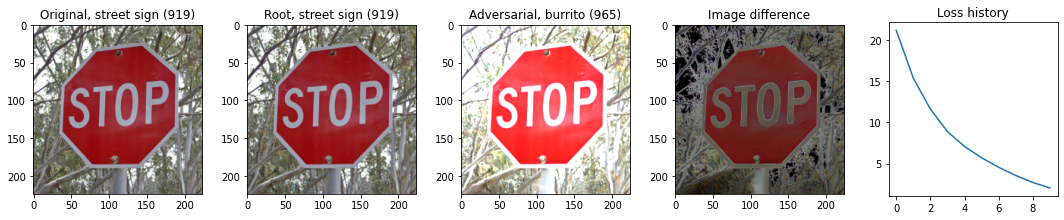

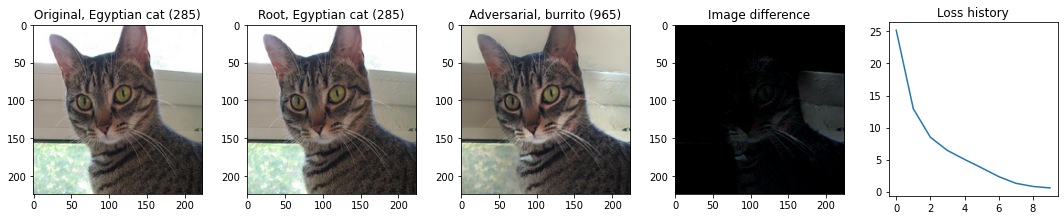

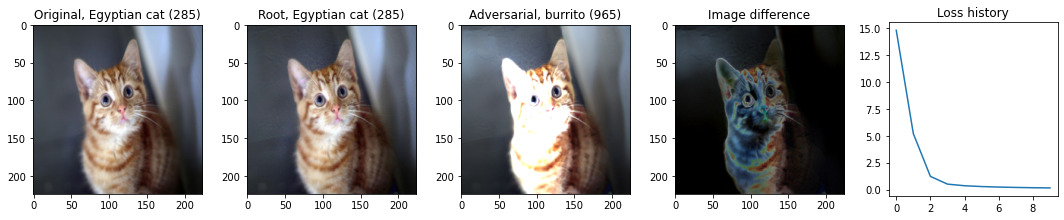

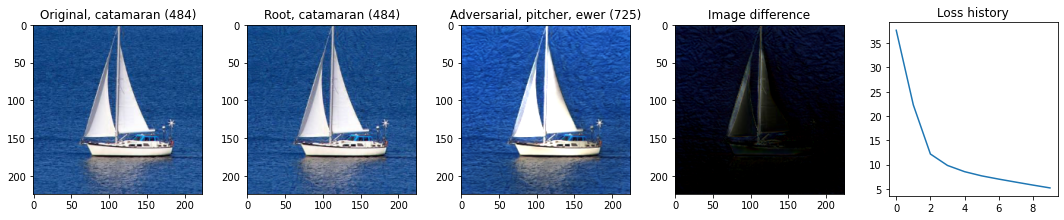

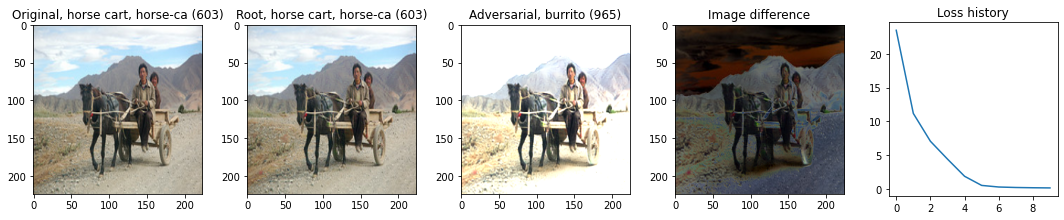

In [7]:
config['attack_type'] = 'class_constrained_eot'
config.pop('gt_label', None)

for im_name in os.listdir(data_path):
    img = utils.read_image(os.path.join(data_path, im_name))  
    result = eot_attacks.do_attack(relight_model, classif_model, img, config)
    utils.visualize_attack(img, result, idx_to_label)
    config.pop('gt_label', None)